In [41]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt,joblib
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import r2_score

In [42]:
ms=pd.read_csv('mushrooms.csv')

In [43]:
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [44]:
ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [45]:
ms.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


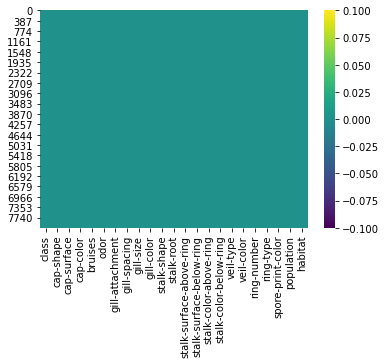

In [46]:
sns.heatmap(ms.isna(),cmap='viridis')

In [47]:
le=LabelEncoder()

In [48]:
for x in ms.columns:
    ms.loc[:,x]=le.fit_transform(ms.loc[:,x])

In [49]:
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


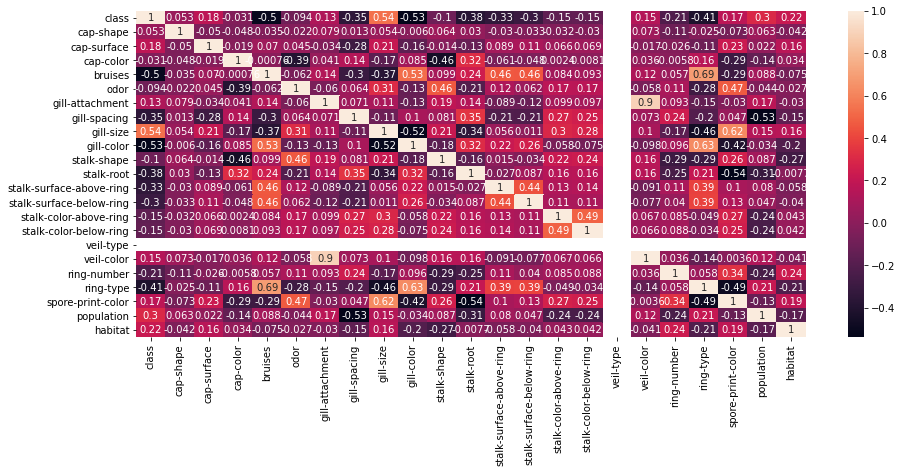

In [50]:
plt.figure(figsize=(15,6))
sns.heatmap(ms.corr(),annot=True)
plt.show()

In [51]:
ms.loc[:,'veil-type'].nunique()

1

In [52]:
ms.drop('veil-type',axis=1,inplace=True)

In [53]:
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [54]:
ms.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

In [55]:
for x in ms.columns:
    if abs(ms.loc[:,x].skew())>0.55:
        ms.loc[:,x]=np.log1p(ms.loc[:,x])

In [56]:
ms.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.810423
cap-color                  -0.365280
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.129453
stalk-surface-above-ring   -1.704645
stalk-surface-below-ring   -1.534620
stalk-color-above-ring     -2.828705
stalk-color-below-ring     -2.807348
veil-color                 -7.718132
ring-number                 1.481287
ring-type                  -0.290018
spore-print-color           0.548426
population                 -2.438878
habitat                     0.342186
dtype: float64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


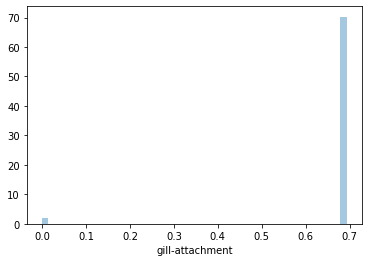

In [57]:
sns.distplot(ms.loc[:,'gill-attachment'])
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


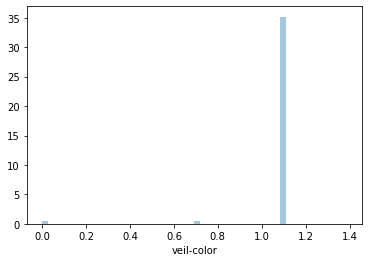

In [58]:
sns.distplot(ms.loc[:,'veil-color'])
plt.show()

In [59]:
ms.drop(['gill-attachment','veil-color'],axis=1,inplace=True)

In [63]:
ms.shape

(8124, 20)

In [65]:
zs=zscore(ms)
ms=ms[(zs<3).all(axis=1)]

In [66]:
ms.shape

(7524, 20)

In [28]:
X=ms.drop('class',axis=1)
y=ms.loc[:,'class']

In [69]:
def model(mod):
    max_score=0
    random_final_state=0
    for x in range(42,102):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=mod
        md.fit(X_train,y_train)
        md_predict=md.predict(X_test)
        r2score=r2_score(y_test,md_predict)
        if max_score<r2score:
            max_score=r2score
            random_final_state=x
    print("Maximum score is {} for random state {}".format(max_score,random_final_state))

In [70]:
model(LogisticRegression(max_iter=10000))

Maximum score is 0.8282243282243282 for random state 96


In [71]:
model(KNeighborsClassifier())

Maximum score is 1.0 for random state 54


In [72]:
model(SVC())

Maximum score is 0.9805828542140215 for random state 82


In [73]:
model(DecisionTreeClassifier())

Maximum score is 1.0 for random state 42


In [74]:
model(RandomForestClassifier())

Maximum score is 1.0 for random state 42


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [76]:
rf=RandomForestClassifier()

In [77]:
rf.fit(X_train,y_train)
rf_predict=rf.predict(X_test)

In [78]:
print(confusion_matrix(y_test,rf_predict))
print()
print(classification_report(y_test,rf_predict))

[[1378    0]
 [   0 1303]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1378
           1       1.00      1.00      1.00      1303

    accuracy                           1.00      2681
   macro avg       1.00      1.00      1.00      2681
weighted avg       1.00      1.00      1.00      2681



In [79]:
joblib.dump(rf,'RandomForest Mushroom.joblib')

['RandomForest Mushroom.joblib']